# Asset Pricing Exercise

## Python version

In [1]:
%precision 4

'%.4f'

### Warm up 1: Functions

First let's practice making functions.

In [2]:
def f(x):
    return 2 * x

In [3]:
f(3)

6

In [4]:
def print_greeting(name):
    greeting = "Hello " + name
    print(greeting)

In [5]:
print_greeting("John")

Hello John


### Warm Up 2: Arrays and NumPy Functions

In [6]:
import numpy as np

In [7]:
a = np.linspace(-1, 1, 6)  # even grid from -1 to 1 with 6 elements

In [8]:
a

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

In [9]:
np.cos(a)

array([ 0.54030231,  0.82533561,  0.98006658,  0.98006658,  0.82533561,
        0.54030231])

In [10]:
np.sin(a)

array([-0.84147098, -0.56464247, -0.19866933,  0.19866933,  0.56464247,
        0.84147098])

In [11]:
np.exp(a)

array([ 0.36787944,  0.54881164,  0.81873075,  1.22140276,  1.8221188 ,
        2.71828183])


### Warm Up 3: Linear Algebra

In [12]:
I = np.identity(3)
I

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [13]:
A = np.arange(9)

In [14]:
A

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
A = A.reshape(3, 3)

In [16]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [17]:
A + I

array([[ 1.,  1.,  2.],
       [ 3.,  5.,  5.],
       [ 6.,  7.,  9.]])

In [18]:
A @ I  # matrix multiplication

array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.]])

In [19]:
A * I  # multiply element by element

array([[ 0.,  0.,  0.],
       [ 0.,  4.,  0.],
       [ 0.,  0.,  8.]])

In [20]:
b = np.ones((3, 1))  # vector of ones, 3 x 1

In [21]:
from scipy.linalg import solve

In [22]:
A = np.random.randn(3, 3)

In [23]:
A

array([[-0.50167196, -1.89018389,  1.29918293],
       [ 1.21106036, -0.19979681,  1.28817361],
       [ 0.01650616, -0.22767174, -2.55646012]])

In [24]:
solve(A, b)  # solve Ax = b

array([[ 0.9773927 ],
       [-0.99224386],
       [-0.29648854]])

In [25]:
from scipy.linalg import eigvals
eigvals(A)

array([-0.36124478+1.57865326j, -0.36124478-1.57865326j, -2.53543933+0.j        ])

### Warm Up 4:  Tests

In [51]:
def g(x, y):
    z = x + y
    assert z >= 0, "sum of arguments is negative"
    return np.log(z)

In [52]:
g(1, 2)

1.0986

In [53]:
g(1, -10)

AssertionError: sum of arguments is negative

## Exercise

Write a function that

* takes $\mathbf J$ as an input
* tests the spectral radius of $\mathbf J$

    * exits with error message if $\geq 1$
    * returns solution $\mathbf v = (\mathbf I - \mathbf J)^{-1} \mathbf J \mathbf 1$ otherwise
    
    
Use it to compute the price dividend ratio when

$$ \mathbf J_{ij} = k(x_i, x_j) P(x_i, x_j) $$

and 


$$ k(X_t, X_{t+1}) = k_{t+1} = m_{t+1} \frac{d_{t+1}}{d_t}  $$

The SDF will be

$$ m_{t+1} = \beta \frac{u'(c_{t+1})}{u'(c_t)} $$

We assume that

$$ c_t = d_t $$

and

$$ \ln \frac{d_{t+1}}{d_t} = X_{t+1} $$

where $\{X_t\}$ is a markov chain.

Regarding the Markov chain, using the following:

In [54]:
import quantecon as qe
mc = qe.tauchen(0.9, 0.02, n=25)

In [55]:
mc.P  # The Markov matrix

array([[  3.44034288e-01,   2.24271241e-01,   2.03740273e-01,
          1.34393121e-01,   6.43608460e-02,   2.23728435e-02,
          5.64354865e-03,   1.03267614e-03,   1.37020130e-04,
          1.31772710e-05,   9.18102294e-07,   4.63213853e-08,
          1.69160441e-09,   4.46941373e-11,   8.53983551e-13,
          1.17683641e-14,   1.11022302e-16,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  1.79397679e-01,   1.85978988e-01,   2.25350428e-01,
          1.98272552e-01,   1.26666043e-01,   5.87482605e-02,
          1.97776033e-02,   4.83136693e-03,   8.56112395e-04,
          1.09997227e-04,   1.02431662e-05,   6.91021078e-07,
          3.37561799e-08,   1.19350030e-09,   3.05285797e-11,
          5.64659430e-13,   7.54951657e-15,   1.11022302e-16,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,

In [56]:
mc.state_values

array([-0.13764944, -0.12617865, -0.11470787, -0.10323708, -0.09176629,
       -0.08029551, -0.06882472, -0.05735393, -0.04588315, -0.03441236,
       -0.02294157, -0.01147079,  0.        ,  0.01147079,  0.02294157,
        0.03441236,  0.04588315,  0.05735393,  0.06882472,  0.08029551,
        0.09176629,  0.10323708,  0.11470787,  0.12617865,  0.13764944])

In [57]:
mc.P.shape

(25, 25)

For utility use $u(c) = c^{1-\gamma}/ (1 - \gamma)$ with $\gamma = 2.0$

For the discount factor set $\beta = 0.98$

If you can, plot your solution.  Show the price dividend ratio at each state.

In [58]:
# Put your solution here!



### Solution

In [59]:
for i in range(40):
    print("The solution is below --- look only after trying hard!")

The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The solution is below --- look only after trying hard!
The soluti

First let's write the function.

In [60]:
def compute_price_dividend_ratio(J):
    n = J.shape[0]
    warning_message = "Spectral radius condition fails"
    assert np.max(np.abs(eigvals(J))) < 1,  warning_message

    I = np.identity(n)
    v = solve(I - J, J @ np.ones(n))
    
    return v

Now we need to work out what $\mathbf J$ is.

With a bit of work you can check that

$$ m_{t+1} = \beta \exp( (1 - \gamma) X_{t+1} ) $$

so

$$ \mathbf J_{ij} = \beta \exp( (1 - \gamma) x_j ) P(x_i, x_j) $$

In [65]:
gamma = 2.0
beta = 0.98

J = beta * mc.P * np.exp((1 - gamma) * mc.state_values)

In [66]:
J

array([[  3.86908433e-01,   2.49343674e-01,   2.23933957e-01,
          1.46028764e-01,   6.91355488e-02,   2.37585076e-02,
          5.92472975e-03,   1.07176289e-03,   1.40584438e-04,
          1.33658521e-05,   9.20620300e-07,   4.59186714e-08,
          1.65777232e-09,   4.33007018e-11,   8.17922551e-13,
          1.11428702e-14,   1.03922481e-16,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  2.01754527e-01,   2.06770534e-01,   2.47685999e-01,
          2.15438822e-01,   1.36062947e-01,   6.23868392e-02,
          2.07629918e-02,   5.01423397e-03,   8.78382466e-04,
          1.11571408e-04,   1.02712594e-05,   6.85013404e-07,
          3.30810563e-08,   1.15629037e-09,   2.92394552e-11,
          5.34647528e-13,   7.06672874e-15,   1.02737220e-16,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,

Now we can call the function:

In [67]:
v = compute_price_dividend_ratio(J)

In [69]:
v

array([ 3806.10504934,  3562.00322003,  3293.0749103 ,  3019.3746033 ,
        2754.20933463,  2504.42987881,  2272.78140959,  2059.86252982,
        1865.22538798,  1687.92394604,  1526.79250318,  1380.59328101,
        1248.09555957,  1128.11745983,  1019.54709396,   921.35238149,
         832.58497519,   752.38193077,   679.9683841 ,   614.66602037,
         555.91794802,   503.35299741,   456.91572584,   417.02375198,
         384.54838611])

In [68]:
matplotlib inline

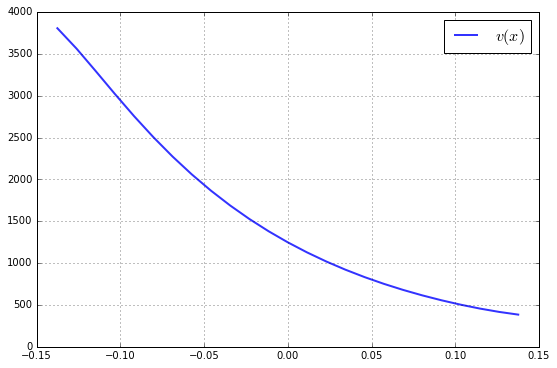

In [64]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (9, 6))
ax.plot(mc.state_values, v, lw=2, alpha=0.8, label="$v(x)$")
ax.legend(fontsize=16)
ax.grid()
plt.show()